# Import all Important Packages

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reading the data

In [2]:
boston_data = pd.read_csv("/content/BostonHousing.csv")

# Check whether read_csv is successful or not
# Check data format loaded through read_csv
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#Data Wrangling

In [3]:
# Input or independent value
X = boston_data.iloc[:, :13]

# Output or dependent value
Y = boston_data["medv"]

#Data Analysis

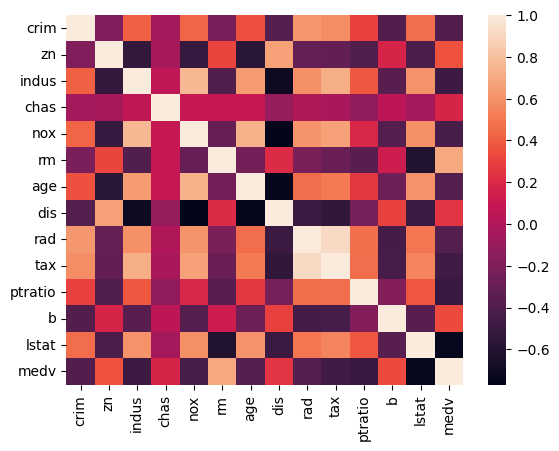

In [4]:
# Find correlation between all available columns
corr = boston_data.corr()
# Find correlated data columns using heatmaps
sns.heatmap(corr)
plt.show()

# Columns which are having correlation +ve and above 0.9 are highly correlated to each other
# We can drop any of them since it will not impact on output

#Right now I am not dropping any column and trying to predict the output with all input data

# Splitting data for training and testing

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=10)

#Applying Regression Models

1. Linear Regression

In [6]:
# model instantiation
linear_model = LinearRegression()

# fit the model with input and corresponding output data
linear_model.fit(x_train, y_train)

LinearRegression()

In [8]:
lr_predictions = linear_model.predict(x_test)
print("Predicted House Prices")
print(lr_predictions)

Predicted House Prices
[31.4243217  31.96785487 30.93785448 22.34313349 18.83846235 16.20617519
 35.92908162 14.74157477 25.07700756 37.13230282 21.47652971 30.92661826
 28.07823424 34.02599249 33.7778476  40.63701192 24.25899783 23.43019291
 25.547906   21.34469147 32.65467539 17.80506124 25.46149722 25.0207691
 32.51742137 20.51357936 19.47165255 16.87107974 38.44316206  0.3888111
 32.39559257 32.15518102 26.05305015 23.82049084 20.56494632 19.66990981
  3.53212643 35.21058387 27.03280773 27.67994129 34.36642896 29.82003002
 18.31717228 31.55109654 17.93465111 28.4618882  19.39950216 21.60782793
 38.10391926 16.45101411 24.51003632 19.57072199 24.53359986 34.34589029
 26.74381857 34.86340026 21.02859444 19.77400901 18.68461884 24.64911818
 19.89923131 23.52871967 39.56690084 42.81848202 30.38116596 16.96889789
 23.83550068  3.18952008 31.52469303 28.66536677 18.40003941 27.1252398
 19.56625808 25.28579071 25.04642543 10.30562974 38.97693514  8.17901104
 18.51160158 30.32060192 22.858

In [9]:
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": lr_predictions, "Actual_Prices": y_test})
print("Predicted and Actual Price Data frame")
print(predicted_dataframe)

Predicted and Actual Price Data frame
     Predicted_Prices  Actual_Prices
305         31.424322           28.4
193         31.967855           31.1
65          30.937854           23.5
349         22.343133           26.6
151         18.838462           19.6
..                ...            ...
56          25.786958           24.7
37          23.322335           21.0
66          26.366349           19.4
427         11.478172           10.9
12          20.449015           21.7

[152 rows x 2 columns]


2. Random Forest Regressor

In [10]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
print("Predicted House Prices Using Random Forest Regressor")
print(rf_predictions)

Predicted House Prices Using Random Forest Regressor
[24.729 28.77  26.252 28.486 19.603 15.305 43.506 15.45  20.634 46.114
 19.941 26.347 24.12  31.504 30.971 43.756 24.932 21.124 21.371 17.218
 33.597 14.965 21.306 24.198 35.541 19.508 18.637 15.429 44.226 13.445
 31.583 31.686 24.21  24.759 16.317 20.304  9.518 34.696 24.045 22.334
 42.916 25.817 10.317 28.862 20.012 26.93  20.602 20.396 48.806 17.116
 19.977 13.93  20.571 45.905 27.287 33.602 19.937 20.767 20.463 27.723
 20.02  20.571 46.306 42.805 25.928 15.803 23.29   8.866 26.987 40.229
 14.83  26.26  19.327 41.298 24.993 17.276 41.167  9.141 19.662 30.847
 19.621 23.841 19.521 23.538 30.826 30.211 23.927 33.192 25.876  6.779
 25.688 18.952 22.114 24.123 19.325 18.345 25.066 21.268 20.713 19.731
 22.256 19.457 21.055 18.943 14.181 20.891 18.892 15.268 29.42  19.193
  9.851 19.192 24.192 25.609 20.699 11.135 18.854 20.242 16.053 20.975
 37.612 33.568 21.24  14.347 17.877 22.685 12.834 20.024 22.603 32.919
 29.066  6.207 30.951 31

In [11]:
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": rf_predictions, "Actual_Prices": y_test})
print("Predicted and Actual Price Data frame")
print(predicted_dataframe)

Predicted and Actual Price Data frame
     Predicted_Prices  Actual_Prices
305            24.729           28.4
193            28.770           31.1
65             26.252           23.5
349            28.486           26.6
151            19.603           19.6
..                ...            ...
56             23.398           24.7
37             21.473           21.0
66             20.322           19.4
427            15.041           10.9
12             20.363           21.7

[152 rows x 2 columns]


3. Decision Tree Regression

In [12]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)
print("Predicted House Prices Using Decision Trees")
print(rf_predictions)

Predicted House Prices Using Decision Trees
[24.729 28.77  26.252 28.486 19.603 15.305 43.506 15.45  20.634 46.114
 19.941 26.347 24.12  31.504 30.971 43.756 24.932 21.124 21.371 17.218
 33.597 14.965 21.306 24.198 35.541 19.508 18.637 15.429 44.226 13.445
 31.583 31.686 24.21  24.759 16.317 20.304  9.518 34.696 24.045 22.334
 42.916 25.817 10.317 28.862 20.012 26.93  20.602 20.396 48.806 17.116
 19.977 13.93  20.571 45.905 27.287 33.602 19.937 20.767 20.463 27.723
 20.02  20.571 46.306 42.805 25.928 15.803 23.29   8.866 26.987 40.229
 14.83  26.26  19.327 41.298 24.993 17.276 41.167  9.141 19.662 30.847
 19.621 23.841 19.521 23.538 30.826 30.211 23.927 33.192 25.876  6.779
 25.688 18.952 22.114 24.123 19.325 18.345 25.066 21.268 20.713 19.731
 22.256 19.457 21.055 18.943 14.181 20.891 18.892 15.268 29.42  19.193
  9.851 19.192 24.192 25.609 20.699 11.135 18.854 20.242 16.053 20.975
 37.612 33.568 21.24  14.347 17.877 22.685 12.834 20.024 22.603 32.919
 29.066  6.207 30.951 31.559 13.1

In [13]:
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": dt_predictions, "Actual_Prices": y_test})
print("Predicted and Actual Price Data frame")
print(predicted_dataframe)

Predicted and Actual Price Data frame
     Predicted_Prices  Actual_Prices
305              26.5           28.4
193              24.0           31.1
65               23.7           23.5
349              25.0           26.6
151              20.8           19.6
..                ...            ...
56               21.9           24.7
37               24.7           21.0
66               21.1           19.4
427              11.7           10.9
12               18.9           21.7

[152 rows x 2 columns]


# Defining Metrics for Evaluation

In [14]:
# Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2 = r2_score(y_test, lr_predictions)

# Decision Tree
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
dt_r2 = r2_score(y_test, dt_predictions)

# Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)


#Comparison Between Models using Evaluation Metrics

In [15]:
print("\nEvaluation Metrics:")
print("Linear Regression:")
print("  MAE:", lr_mae)
print("  RMSE:", lr_rmse)
print("  R2 Score:", lr_r2)

print("\nDecision Tree:")
print("  MAE:", dt_mae)
print("  RMSE:", dt_rmse)
print("  R2 Score:", dt_r2)

print("\nRandom Forest:")
print("  MAE:", rf_mae)
print("  RMSE:", rf_rmse)
print("  R2 Score:", rf_r2)


Evaluation Metrics:
Linear Regression:
  MAE: 3.70712713727182
  RMSE: 5.415403634644724
  R2 Score: 0.6996255772983111

Decision Tree:
  MAE: 2.9440789473684212
  RMSE: 4.257895143451935
  R2 Score: 0.8143088485786317

Random Forest:
  MAE: 2.4597499999999983
  RMSE: 3.501828402120059
  R2 Score: 0.8743996046182325


#### ***After analyzing these models, random forest model proved better because of their better performance metrics (lower MAE, RMSE, and higher R2 score).***